# Basic Outlier Testing with Generated Data

### Get Data

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from test_connection import define_conn

In [3]:
engine, conn = define_conn()

data = pd.read_sql("""
    SELECT * FROM meas_values
""", conn).sort_values(by=["tool", "run_timestamp", "time"]).reset_index(drop=True)

data_summary = pd.read_sql("""
    SELECT * FROM meas_values_summary
""", conn).sort_values(by=["tool", "run_timestamp"]).reset_index(drop=True)

In [4]:
display(data.head(3))
print(data.shape)

,id,tool,run_timestamp,filename,time,value
0,1711,000,2024-01-22 07:10:35.715000+00:00,000_20240121_231035.715.csv,0,100.107971
1,1712,000,2024-01-22 07:10:35.715000+00:00,000_20240121_231035.715.csv,1,101.659725
2,1713,000,2024-01-22 07:10:35.715000+00:00,000_20240121_231035.715.csv,2,102.374084


(4200, 6)


In [5]:
display(data_summary.head(3))
print(data_summary.shape)

,tool,run_timestamp,mean_value,total_value,max_value,min_value
0,000,2024-01-22 07:10:35.715000+00:00,102.099502,3062.985062,103.686454,99.614622
1,000,2024-02-03 13:17:58.259000+00:00,99.163591,2974.907738,101.375072,96.836530
2,000,2024-02-03 13:18:44.342000+00:00,100.845600,3025.368000,102.632252,98.334298


(140, 6)


### EDA

In [6]:
data_summary.groupby("tool")[["mean_value", "total_value", "max_value", "min_value"]].agg("mean")

,mean_value,total_value,max_value,min_value
tool,,,,
000,99.955642,2998.669263,101.954635,97.860225
001,100.095287,3002.858619,102.472335,98.011082
002,100.222054,3006.661620,102.110325,98.196374
003,99.561311,2986.839322,101.766905,97.630045
004,99.888842,2996.665249,102.080720,97.866037
005,100.221511,3006.645323,102.200275,98.258138
006,99.820238,2994.607153,101.847762,97.794946
007,100.058726,3001.761774,101.974654,97.951068
008,100.195051,3005.851525,102.440020,98.047717


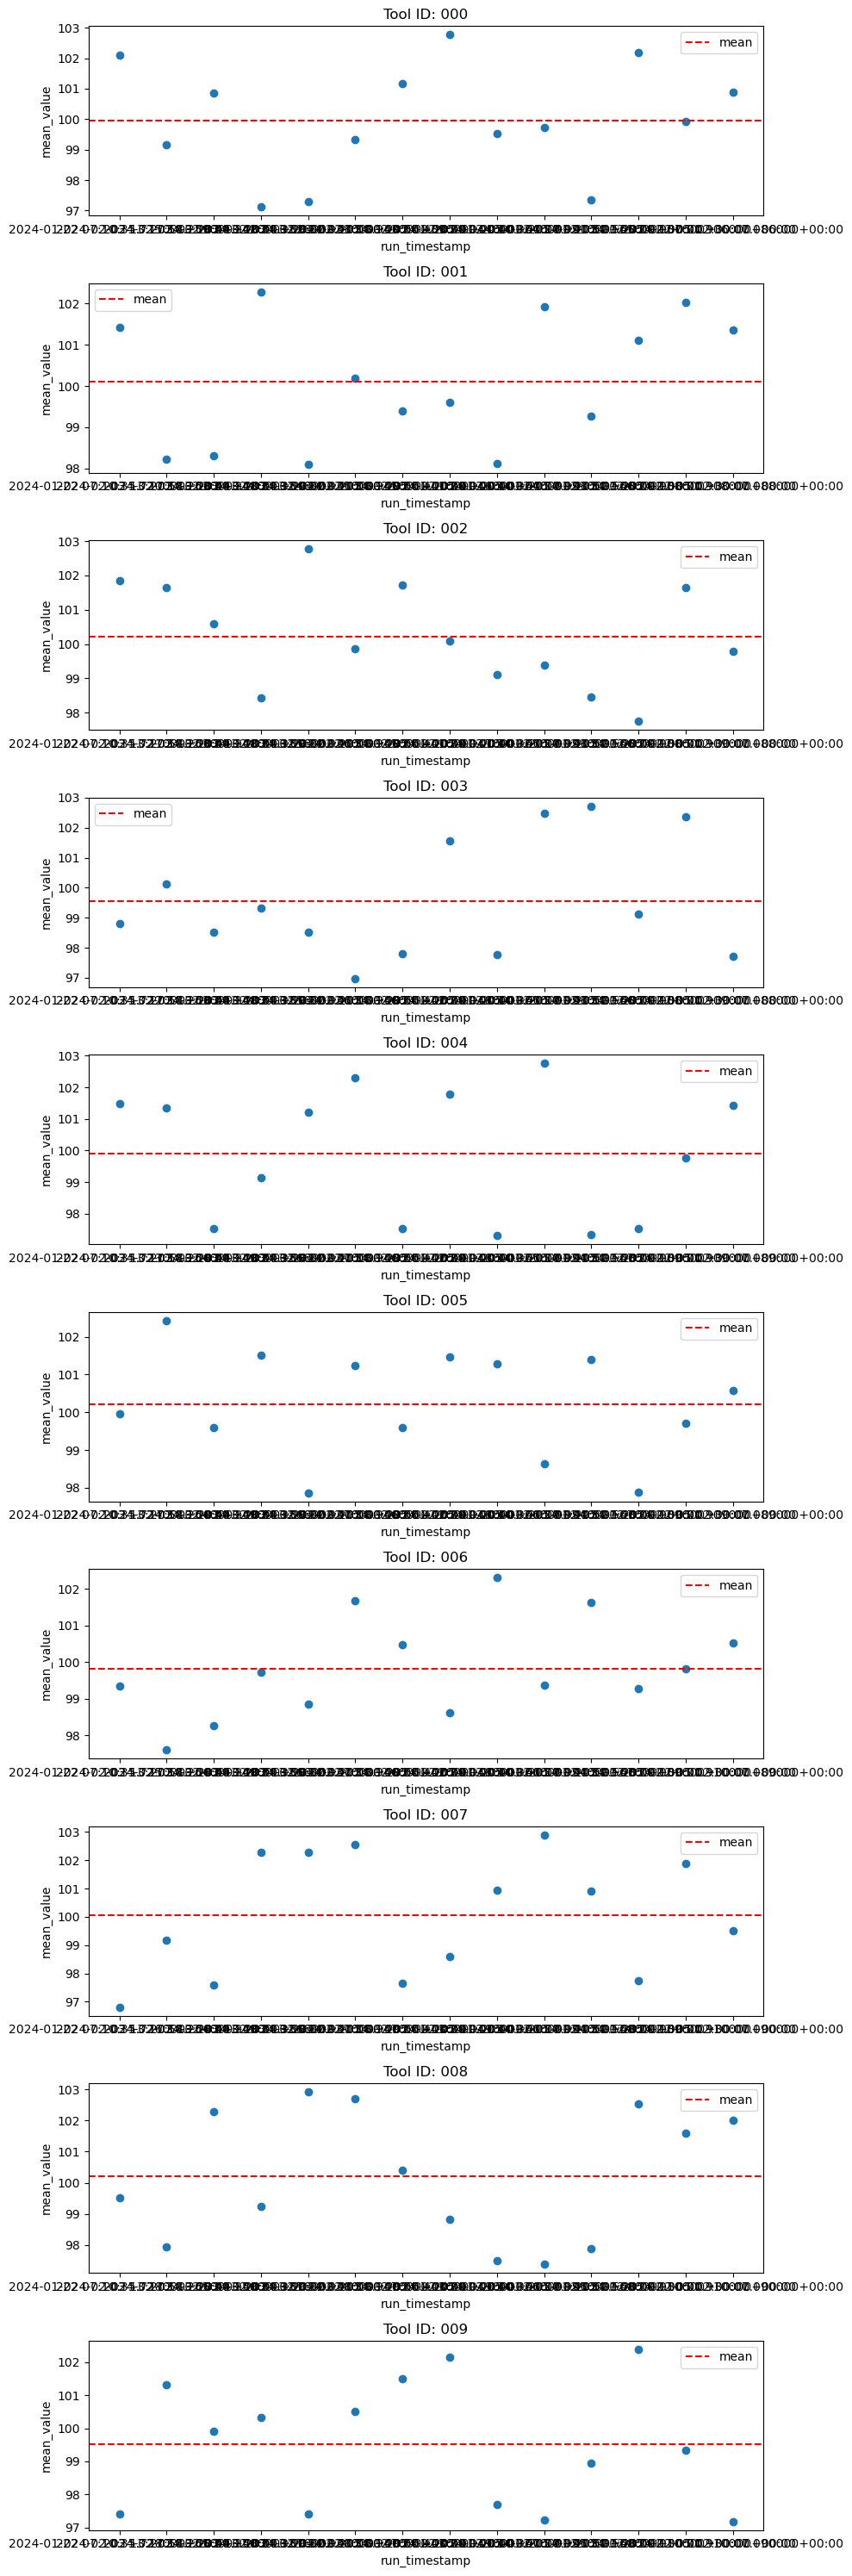

In [7]:
# Create the subplots
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(10, 30))

# Iterate over each unique tool_id
for idx, tool in enumerate(data_summary['tool'].unique()):
    # Select data for the current tool_id
    tool_data = data_summary[data_summary['tool'].eq(tool)]
    mean = tool_data["mean_value"].mean()

    # Plot the data for the current tool
    axes[idx].scatter(tool_data['run_timestamp'].astype(str), tool_data['mean_value'])
    axes[idx].set_xlabel('run_timestamp')
    axes[idx].set_ylabel('mean_value')
    axes[idx].set_title(f'Tool ID: {tool}')
    axes[idx].axhline(mean, c="r", linestyle="--", label="mean")
    axes[idx].legend(loc="best")


# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


ValueError: The following variable cannot be assigned with wide-form data: `hue`

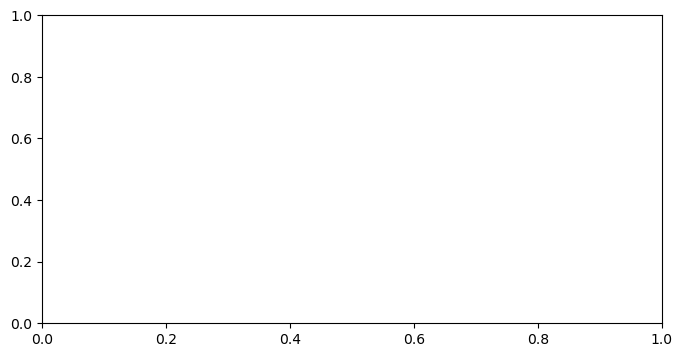

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

sns.histplot(data["value"], bins=100, hue="outlier")
plt.show()

## Test all raw data for outliers in meas_value

In [10]:
data["outlier"] = False
mask = (data["value"].gt(103) | data["value"].lt(97))
data.loc[mask, "outlier"] = True


In [11]:
data

,id,tool,run_timestamp,filename,time,value,outlier
0,1711,000,2024-01-22 07:10:35.715000+00:00,000_20240121_231035.715.csv,0,100.107971,False
1,1712,000,2024-01-22 07:10:35.715000+00:00,000_20240121_231035.715.csv,1,101.659725,False
2,1713,000,2024-01-22 07:10:35.715000+00:00,000_20240121_231035.715.csv,2,102.374084,False
3,1714,000,2024-01-22 07:10:35.715000+00:00,000_20240121_231035.715.csv,3,103.379155,True
4,1715,000,2024-01-22 07:10:35.715000+00:00,000_20240121_231035.715.csv,4,102.575684,False
...,...,...,...,...,...,...,...
4195,13556,009,2024-02-05 02:30:07.090000+00:00,009_20240204_183007.090.csv,25,97.258370,False
4196,13557,009,2024-02-05 02:30:07.090000+00:00,009_20240204_183007.090.csv,26,95.975483,True
4197,13558,009,2024-02-05 02:30:07.090000+00:00,009_20240204_183007.090.csv,27,98.489042,False
4198,13559,009,2024-02-05 02:30:07.090000+00:00,009_20240204_183007.090.csv,28,95.405854,True
